In [1]:
import numpy as np, sympy as sp, math
from sympy import symbols, Piecewise, And, lambdify
import matplotlib.pyplot as plt

In [2]:
x = symbols('x')

n = int(input('Please Enter n: '))
expr_str = input('Please Enter function of x (e.g. Piecewise((x, x>=0),(0,True))): ')

expr_sym = sp.sympify(expr_str)

fn = lambdify(x, expr_sym, modules=['numpy'])

xn = np.linspace(0, n + 1, n + 1)
y = a = fn(xn)
b = np.zeros([n+1])
d = np.zeros([n])
c_mat = np.zeros([n + 1, n + 1])
b_vec = np.zeros(n + 1)
h = xn[1:] - xn[:-1]

In [3]:
i = np.arange(1, n)

c_mat[i,i-1] = h[i-1]
c_mat[i,i] = 2*(h[i-1] + h[i])
c_mat[i,i+1] = h[i]

b_vec[i] = (3 / h[i]) * (a[i+1] - a[i-1]) - (3 / h[i-1]) * (a[i] - a[i-1])

c_mat[0,0] = 1
c_mat[0,1] = -(1 + xn[0] / xn[1])
c_mat[0,2] = xn[0] / xn[1]
b_vec[0] = 0

c_mat[n,n] = 1
c_mat[n,n-1] = -(1 + (xn[n] - xn[n - 1]) / (xn[n - 1] - xn[n - 2]))
c_mat[n,n-2] = (xn[n - 1] - xn[n - 2]) / (xn[n - 2] - xn[n - 3])
b_vec[n] = 0

c = np.linalg.solve(c_mat, b_vec)

h = xn[1:] - xn[:-1]
b = (a[1:] - a[:-1])/(3 * h) - h * (2*c[:-1] + c[1:]) / 3
d = (c[1:] - c[:-1])/(3 * h)

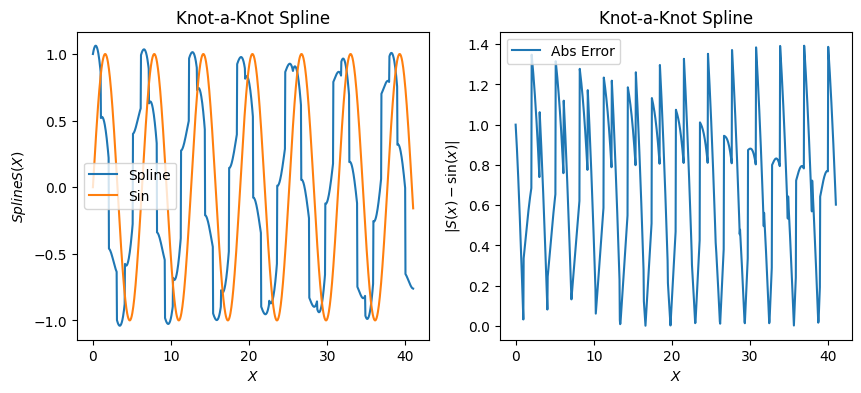

In [4]:
x = symbols('x')
s = []
for i in range(n):
    s.append(a[i] + b[i] * (x-xn[i]) + c[i] * (x-xn[i]) ** 2 + d[i] * (x-xn[i]) ** 3)

pieces = []
for i in range(n):
    cond = And(x >= xn[i], x < xn[i+1])
    pieces.append((s[i], cond))
pieces.append((0, True))
pieces[-2] = (s[n-1], And(x >= xn[n-1], x <= xn[n]))
Spl = Piecewise(*pieces)
Spl = sp.simplify(Spl)
spline = lambdify(x, Spl, "numpy")

space = np.linspace(xn[0], xn[-1], 1000)
function_space_spline = spline(space)
function_space_sin = np.sin(space)
abs_error = np.abs(function_space_spline - function_space_sin)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(space, function_space_spline, label='Spline')
plt.plot(space, function_space_sin, label='Sin')
plt.xlabel('$X$')
plt.legend()
plt.ylabel('$Spline S(X)$')
plt.title("Knot-a-Knot Spline")
plt.subplot(1,2,2)
plt.plot(space, abs_error, label='Abs Error')
plt.xlabel('$X$')
plt.legend()
plt.ylabel(r'$|S(x)-\sin(x)|$')
plt.title("Knot-a-Knot Spline")
plt.show()